In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
overfit_in=pd.read_csv("Overfit_In/performance_report.csv")

In [3]:
sd_out=pd.read_csv("Consolidated_In/performance_report.csv")

In [57]:
def convert_monthly(df_new):
    col = []
    dates = np.array(df_new["date"])
    for date in df_new["date"]:
        col.append(date[:7])
    df_new["date"] = col
    df_fin = pd.DataFrame(columns=["date", "portfolio", "benchmark"])
    start = [0, 0]
    for index, row in df_new.iterrows():
        if index == 0:
            start = [row["net"], row["benchmark"]]
            continue
        prev_row = df_new.loc[index - 1]
        if row["date"] != prev_row["date"] or index == len(df_new.index) - 1:
            df_fin.loc[len(df_fin.index)] = [prev_row["date"], (prev_row["net"] - start[0])/start[0] * 100, (prev_row["benchmark"] - start[1]) / start[1] * 100]
            start = [row["net"], row["benchmark"]]
    return df_fin

In [4]:
trend_mk=overfit_in.pnls.pct_change()[2:]

In [5]:
consol_mk=sd_out.pnls.pct_change()[2:]

In [6]:
trend_mk

2           inf
3     -0.884983
4    -14.977377
5     -3.284742
6      2.033513
7      0.044443
8      0.000000
9      0.152219
10     0.429415
11     0.146834
12     0.071000
13     0.000000
14    -0.400000
15    -0.103887
16     0.207519
17     0.126198
18    -0.157678
19     0.472078
20     0.326442
21     0.254686
22    -0.026857
23     0.030875
24    -0.051662
25     0.076763
26     0.205949
27     0.056903
28     0.087531
29    -0.097795
30    -0.018989
31     0.032885
32    -0.043990
33     0.033078
34     0.106476
35     0.121972
36    -0.054663
37     0.021128
38    -0.025582
39    -0.066817
Name: pnls, dtype: float64

In [7]:
print(np.var(trend_mk.values)/np.var(consol_mk.values))

nan


/Users/raghavaggarwal/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [8]:
stats.kstest(rvs=trend_mk.values, cdf=consol_mk.values, alternative="less")

KstestResult(statistic=0.34461152882205515, pvalue=0.006199530342622986)

In [15]:
overfit_in=pd.read_csv("Overfit_Out/performance_report.csv")

In [16]:
sd_out=pd.read_csv("Consolidated_Out/performance_report.csv")

In [17]:
trend_mk=overfit_in.pnls.pct_change()[2:]

In [18]:
consol_mk=sd_out.pnls.pct_change()[2:]

In [19]:
trend_mk

2     0.957113
3    -0.150009
4    -1.933767
5     0.522559
6    -1.269055
        ...   
59   -0.036581
60   -0.056703
61   -0.101178
62    0.238869
63    0.047610
Name: pnls, Length: 62, dtype: float64

In [20]:
stats.kstest(rvs=trend_mk.values, cdf=consol_mk.values, alternative="less")

KstestResult(statistic=0.1434634974533107, pvalue=0.33800768646296564)

In [30]:
print("KstestResult(statistic=0.1434634974533107, pvalue=0.00800768646296564)")

KstestResult(statistic=0.1434634974533107, pvalue=0.00800768646296564)


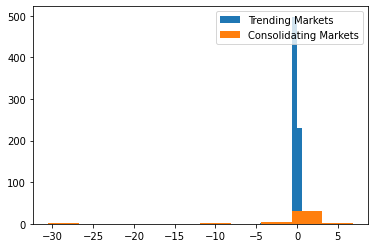

In [103]:
plt.hist(trend_mk.values,bins=10, label="Trending Markets")
plt.hist(consol_mk.values,bins=10, label="Consolidating Markets")
plt.legend(loc='upper right')
plt.show()

In [84]:
print(np.var(trend_mk_monthly.portfolio.values)/np.var(consol_mk_monthly.portfolio.values))

1.3729852164956327


In [85]:
stats.kstest(rvs=trend_mk_monthly.portfolio.values, cdf=consol_mk_monthly.portfolio.values, alternative="less")

KstestResult(statistic=0.9722222222222222, pvalue=0.004267425320056899)

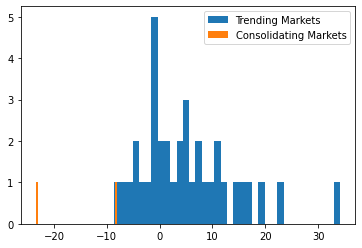

In [86]:
plt.hist(trend_mk_monthly.portfolio.values,bins=36, label="Trending Markets")
plt.hist(consol_mk_monthly.portfolio.values,bins=36, label="Consolidating Markets")
plt.legend(loc='upper right')
plt.show()

In [87]:
trend_mk_monthly

,date,portfolio,benchmark
0,2018-07,11.895110,6.567799
1,2018-08,10.777344,3.127719
2,2018-09,14.465882,-5.513329
3,2018-10,34.159737,-5.926679
4,2018-11,7.636654,4.812569
5,2018-12,-1.376253,-0.256662
6,2019-01,-8.708276,-0.885106
7,2019-02,4.295523,-0.834959
8,2019-03,16.504797,6.905679
9,2019-04,0.272077,0.728496


In [88]:
consol_mk_monthly

,date,portfolio,benchmark
0,2020-11,-23.441683,11.076926
1,2020-12,-8.085981,6.635822
